In [32]:
from loss.mnist_lenet import *
from solvers.spectral.ao_exp_grad import ao_exp_grad as ao_exp_grad_mat
from solvers.ao_exp_grad import ao_exp_grad 
from solvers.ao_grad import ao_grad
from solvers.ao_exp_ftrl import  ao_exp_ftrl 
from solvers.ao_ftrl import ao_ftrl
from loss.grad_2p import Grad_2p

In [42]:
maxfev=1000
train_loss=[]
cem = CEM(index=340)
func=PP_Loss(cem)
#func_p=PP_Grad(cem)
func_p=Grad_2p(func=func, delta=0.001, n=10)
l1=0.01
l2=0.01
s=np.linalg.svd(cem.pp_init,full_matrices=False,compute_uv=False)
regl1=np.linalg.norm(s.flatten(),ord=1)
regl2=np.linalg.norm(cem.pp_init.flatten(),ord=2)**2
attack=func(cem.pp_init)
print('iteration: ',0,' attack: ', attack,' loss: ',1.0,' l1: ',regl1,' l2: ',regl2 )
init_loss=attack+l1*regl1+0.5*l2*regl2+1.0
train_loss.append(1.0)
def callback(res):
    s=np.linalg.svd(res.x,full_matrices=False,compute_uv=False)
    regl1=np.linalg.norm(s.flatten(),ord=1)
    regl2=np.linalg.norm(res.x.flatten(),ord=2)**2
    cur_loss=res.func+l1*regl1+0.5*l2*regl2+1.0
    print('iteration: ',res.nit,' attack: ', res.func,' loss: ',cur_loss/init_loss,' l1: ',regl1,' l2: ',regl2 )
    train_loss.append(cur_loss/init_loss)
result = ao_exp_grad(func=func, func_p=func_p, x0=cem.pp_init, lower=cem.pp_lower, upper=cem.pp_upper,l1=l1,l2=l2,maxfev=maxfev,callback=callback,epoch_size=1)

iteration:  0  attack:  -0.2081971  loss:  1.0  l1:  19.016115368429688  l2:  77.5544029044687
iteration:  1  attack:  -0.31260687  loss:  0.802203188404869  l1:  17.61459778364479  l2:  47.0535065830673
iteration:  2  attack:  -0.24260806  loss:  0.7802148198889436  l1:  14.866229091533368  l2:  32.526828557270335
iteration:  3  attack:  -0.21109334  loss:  0.788044654090454  l1:  14.328987515426329  l2:  29.44332914348535
iteration:  4  attack:  -0.19776076  loss:  0.7781091083786704  l1:  13.451186443070265  l2:  25.810601116401248
iteration:  5  attack:  -0.18230082  loss:  0.7856015683946672  l1:  13.317989828339357  l2:  25.037544920150264
iteration:  6  attack:  -0.17908356  loss:  0.7808100393896088  l1:  12.950944951513339  l2:  23.81555565367822
iteration:  7  attack:  -0.16673282  loss:  0.7857699284262095  l1:  12.765871015667024  l2:  23.074303695272132
iteration:  8  attack:  -0.1659726  loss:  0.7794927734732077  l1:  12.409893196527378  l2:  21.914607718905298
iteration

iteration:  73  attack:  -0.29787904  loss:  0.6302934458457338  l1:  9.513546810838765  l2:  13.215847446505048
iteration:  74  attack:  -0.2988752  loss:  0.6293308782650846  l1:  9.49676397408986  l2:  13.184954899344287
iteration:  75  attack:  -0.2999887  loss:  0.6284443392525734  l1:  9.491695601826857  l2:  13.174921625764178
iteration:  76  attack:  -0.30079073  loss:  0.6276090168317212  l1:  9.473512389127709  l2:  13.142861821823312
iteration:  77  attack:  -0.3013187  loss:  0.6269177022933643  l1:  9.45065273312202  l2:  13.104793031255848
iteration:  78  attack:  -0.3020958  loss:  0.6261238124690127  l1:  9.432606374987053  l2:  13.078820953768009
iteration:  79  attack:  -0.303259  loss:  0.6252742324235504  l1:  9.429011206157885  l2:  13.085908134096467
iteration:  80  attack:  -0.30419362  loss:  0.6245142683191668  l1:  9.421215097639422  l2:  13.080236429046677
iteration:  81  attack:  -0.304999  loss:  0.6237746115820259  l1:  9.410040882828927  l2:  13.061033548

iteration:  146  attack:  -0.33379877  loss:  0.5952376286609605  l1:  8.895023257015845  l2:  12.033396307124356
iteration:  147  attack:  -0.33425164  loss:  0.5947870252927329  l1:  8.886177697183172  l2:  12.018221107982805
iteration:  148  attack:  -0.33469683  loss:  0.5943287094570602  l1:  8.87669698338224  l2:  12.000665607978727
iteration:  149  attack:  -0.33497185  loss:  0.5939853488371836  l1:  8.867226727714405  l2:  11.980546600557732
iteration:  150  attack:  -0.33511186  loss:  0.5937184446154042  l1:  8.856576476186257  l2:  11.956731697968085
iteration:  151  attack:  -0.33537257  loss:  0.5933878528541928  l1:  8.84851337234621  l2:  11.934435357190003
iteration:  152  attack:  -0.3355663  loss:  0.5930612661394946  l1:  8.837219943917018  l2:  11.906303673240416
iteration:  153  attack:  -0.33567917  loss:  0.5927778330311166  l1:  8.825196274728231  l2:  11.875277580411186
iteration:  154  attack:  -0.335843  loss:  0.5924692304381439  l1:  8.813087240116692  l2:

iteration:  227  attack:  -0.3387593  loss:  0.5779356716476767  l1:  7.955865205138173  l2:  10.163996894655957
iteration:  228  attack:  -0.33894682  loss:  0.5776952491768175  l1:  7.949015292635336  l2:  10.14933689625946
iteration:  229  attack:  -0.33910072  loss:  0.5774562895374487  l1:  7.940815032810241  l2:  10.13105492718707
iteration:  230  attack:  -0.3392032  loss:  0.5772729695513747  l1:  7.934121612535936  l2:  10.114719805755746
iteration:  231  attack:  -0.33916444  loss:  0.5771978757215807  l1:  7.927315911730478  l2:  10.100004897676943
iteration:  232  attack:  -0.33907807  loss:  0.5771380343871289  l1:  7.918905023561513  l2:  10.083159881148674
iteration:  233  attack:  -0.3390059  loss:  0.5770708332627132  l1:  7.910969735022789  l2:  10.066184652500514
iteration:  234  attack:  -0.33912584  loss:  0.5769061142404254  l1:  7.905358762933717  l2:  10.056273149075505
iteration:  235  attack:  -0.3391449  loss:  0.5767948951802442  l1:  7.898476312402947  l2: 

iteration:  307  attack:  -0.34337938  loss:  0.5681356861746267  l1:  7.49217111487896  l2:  9.330721410096137
iteration:  308  attack:  -0.34343547  loss:  0.5680406787407124  l1:  7.487397047934603  l2:  9.325460116372613
iteration:  309  attack:  -0.34346986  loss:  0.5679461408442453  l1:  7.481897632066641  l2:  9.31743893083183
iteration:  310  attack:  -0.34354872  loss:  0.567848142483814  l1:  7.478273953526809  l2:  9.313611299175708
iteration:  311  attack:  -0.34363508  loss:  0.5677337975668152  l1:  7.47397368624444  l2:  9.308160788435078
iteration:  312  attack:  -0.34371504  loss:  0.5676173451843487  l1:  7.468994035254934  l2:  9.302210210954168
iteration:  313  attack:  -0.34378272  loss:  0.5675144266128811  l1:  7.464537379466588  l2:  9.29646548151402
iteration:  314  attack:  -0.34383157  loss:  0.5673982701554668  l1:  7.458729120898285  l2:  9.286030462119525
iteration:  315  attack:  -0.3438444  loss:  0.5673258217376486  l1:  7.453659042522327  l2:  9.27889

iteration:  388  attack:  -0.34506774  loss:  0.562802485949784  l1:  7.182316237082029  l2:  8.827088059965218
iteration:  389  attack:  -0.3451048  loss:  0.5627574671699682  l1:  7.180705013329254  l2:  8.825392556006335
iteration:  390  attack:  -0.34514314  loss:  0.5627044175900134  l1:  7.17853122258135  l2:  8.822872510227457
iteration:  391  attack:  -0.34518346  loss:  0.5626476017668034  l1:  7.1763264735987065  l2:  8.819781980193937
iteration:  392  attack:  -0.3451862  loss:  0.5625891918685528  l1:  7.172114949588271  l2:  8.812752162094698
iteration:  393  attack:  -0.34516674  loss:  0.5625397013606879  l1:  7.1678409128660405  l2:  8.803850265523323
iteration:  394  attack:  -0.34519717  loss:  0.5624730614493458  l1:  7.164617284980578  l2:  8.798127337522354
iteration:  395  attack:  -0.34518406  loss:  0.5624200904346841  l1:  7.160245674386901  l2:  8.789736692489955
iteration:  396  attack:  -0.34519017  loss:  0.5623592551582712  l1:  7.156205252176659  l2:  8.7

iteration:  462  attack:  -0.34240717  loss:  0.560545758174012  l1:  6.903578008755794  l2:  8.234225725610546
iteration:  463  attack:  -0.3423418  loss:  0.560536112705514  l1:  6.899906257403832  l2:  8.225855580499672
iteration:  464  attack:  -0.34227735  loss:  0.5605193919189311  l1:  6.895741749375608  l2:  8.216711499003463
iteration:  465  attack:  -0.34222168  loss:  0.5604925464858797  l1:  6.891278658097459  l2:  8.20714930234275
iteration:  466  attack:  -0.34215802  loss:  0.5604742615369396  l1:  6.887146223779297  l2:  8.1976735080485
iteration:  467  attack:  -0.34210193  loss:  0.5604508033320171  l1:  6.882822027978581  l2:  8.188677995636812
iteration:  468  attack:  -0.34208184  loss:  0.5604117919461966  l1:  6.879076299211624  l2:  8.181465039682266
iteration:  469  attack:  -0.34204543  loss:  0.5603799492577491  l1:  6.875153552433214  l2:  8.17330362988493
iteration:  470  attack:  -0.34198618  loss:  0.5603486658067822  l1:  6.870269487126084  l2:  8.162652

iteration:  543  attack:  -0.33808008  loss:  0.559676210088349  l1:  6.654695762115997  l2:  7.6283622251475265
iteration:  544  attack:  -0.33808702  loss:  0.5596495412569891  l1:  6.653380288092228  l2:  7.625076109386606
iteration:  545  attack:  -0.3380739  loss:  0.5596325400656084  l1:  6.651868678034691  l2:  7.620819296130841
iteration:  546  attack:  -0.3380601  loss:  0.5596145282474767  l1:  6.650139591548656  l2:  7.616583486667086
iteration:  547  attack:  -0.33804435  loss:  0.5595996827693656  l1:  6.648642329159189  l2:  7.612358048379458
iteration:  548  attack:  -0.33803326  loss:  0.559581946333446  l1:  6.647154667827469  l2:  7.608257231064074
iteration:  549  attack:  -0.33806977  loss:  0.5595401243159333  l1:  6.646351671465489  l2:  7.60570776762289
iteration:  550  attack:  -0.33808088  loss:  0.5595151503102244  l1:  6.645561940764009  l2:  7.60266892300827
iteration:  551  attack:  -0.3380921  loss:  0.5594864304558369  l1:  6.644480053374814  l2:  7.59920

iteration:  616  attack:  -0.33738858  loss:  0.558209153286863  l1:  6.530611297750633  l2:  7.336334374157602
iteration:  617  attack:  -0.33736533  loss:  0.5581931650630434  l1:  6.5284651472876  l2:  7.331597583430975
iteration:  618  attack:  -0.33735543  loss:  0.5581679092066135  l1:  6.526233701168022  l2:  7.327162829976326
iteration:  619  attack:  -0.33734667  loss:  0.5581422823700299  l1:  6.523998050375365  l2:  7.322861354538747
iteration:  620  attack:  -0.33733013  loss:  0.5581190197483934  l1:  6.521656723190017  l2:  7.317863220754154
iteration:  621  attack:  -0.33732754  loss:  0.5580929953658005  l1:  6.519721867724231  l2:  7.3140850641882595
iteration:  622  attack:  -0.33733353  loss:  0.5580647041374839  l1:  6.518087434402389  l2:  7.310801681035144
iteration:  623  attack:  -0.33732986  loss:  0.5580403642190889  l1:  6.516208892016376  l2:  7.307157775861369
iteration:  624  attack:  -0.33732888  loss:  0.5580140070173246  l1:  6.514399650762133  l2:  7.3

iteration:  690  attack:  -0.33744144  loss:  0.5564492904527374  l1:  6.408611120687537  l2:  7.108799073153869
iteration:  691  attack:  -0.33742514  loss:  0.5564204316955657  l1:  6.405831930404767  l2:  7.103191303545127
iteration:  692  attack:  -0.33743238  loss:  0.5563799427163333  l1:  6.403313390260447  l2:  7.098584933673696
iteration:  693  attack:  -0.33743912  loss:  0.5563464838874725  l1:  6.401165293530562  l2:  7.0950622391803355
iteration:  694  attack:  -0.33742166  loss:  0.5563258706973845  l1:  6.398753705718257  l2:  7.090745656640266
iteration:  695  attack:  -0.33736974  loss:  0.5563311686200473  l1:  6.3963681999235025  l2:  7.086584890259418
iteration:  696  attack:  -0.33730048  loss:  0.5563438763272047  l1:  6.393709929089736  l2:  7.08153055344372
iteration:  697  attack:  -0.3372307  loss:  0.5563574637313947  l1:  6.3910334041418055  l2:  7.076652387510843
iteration:  698  attack:  -0.33716634  loss:  0.5563708775487298  l1:  6.388606266541609  l2:  

iteration:  764  attack:  -0.33604416  loss:  0.5562008865504586  l1:  6.30918238986682  l2:  6.9601506009759095
iteration:  765  attack:  -0.33605963  loss:  0.5561824846680026  l1:  6.3084189050330775  l2:  6.959729907289842
iteration:  766  attack:  -0.33608648  loss:  0.5561575189987703  l1:  6.3077418684133555  l2:  6.959615083510389
iteration:  767  attack:  -0.33611298  loss:  0.5561315957779228  l1:  6.306933535032251  l2:  6.959429009083484
iteration:  768  attack:  -0.33614963  loss:  0.5561009760350295  l1:  6.3063702606898495  l2:  6.959498735839539
iteration:  769  attack:  -0.33616313  loss:  0.5560834890853145  l1:  6.305555446405114  l2:  6.959037953674653
iteration:  770  attack:  -0.3361892  loss:  0.5560576704378689  l1:  6.304746016105079  l2:  6.958799274174948
iteration:  771  attack:  -0.33622932  loss:  0.556026221780314  l1:  6.304292220413016  l2:  6.9591143786481915
iteration:  772  attack:  -0.33623922  loss:  0.5560097226084584  l1:  6.303377601519589  l2: 

iteration:  837  attack:  -0.33678916  loss:  0.5551837946516379  l1:  6.259161710177511  l2:  6.93056216006173
iteration:  838  attack:  -0.3367778  loss:  0.5551829020239262  l1:  6.2582558874507175  l2:  6.929858335675278
iteration:  839  attack:  -0.33677518  loss:  0.5551775977421065  l1:  6.257440567616663  l2:  6.929511361246558
iteration:  840  attack:  -0.3367784  loss:  0.5551688487364519  l1:  6.256741437589016  l2:  6.929156585747647
iteration:  841  attack:  -0.336771  loss:  0.5551652039654624  l1:  6.255899142530801  l2:  6.928364505818153
iteration:  842  attack:  -0.33676106  loss:  0.5551625035279889  l1:  6.254975048191836  l2:  6.927482122040131
iteration:  843  attack:  -0.33674985  loss:  0.5551604309748986  l1:  6.254037257350595  l2:  6.9265487989356584
iteration:  844  attack:  -0.33674228  loss:  0.555155081414967  l1:  6.253107620456119  l2:  6.925428617711932
iteration:  845  attack:  -0.33674046  loss:  0.5551465492842269  l1:  6.252104090380258  l2:  6.924

iteration:  917  attack:  -0.33712417  loss:  0.5542990240872488  l1:  6.199122836039113  l2:  6.875261059049451
iteration:  918  attack:  -0.33714068  loss:  0.5542774660464871  l1:  6.198259925002021  l2:  6.874383213254395
iteration:  919  attack:  -0.33716  loss:  0.554255606224696  l1:  6.197538226121139  l2:  6.873700554735761
iteration:  920  attack:  -0.33718696  loss:  0.5542310771200437  l1:  6.19695358775522  l2:  6.873544371956705
iteration:  921  attack:  -0.33721334  loss:  0.5542075636264076  l1:  6.1964061090534015  l2:  6.873472884367558
iteration:  922  attack:  -0.3372352  loss:  0.5541849848162325  l1:  6.195714756578692  l2:  6.873045168117493
iteration:  923  attack:  -0.33725733  loss:  0.5541629756090563  l1:  6.195088494889664  l2:  6.872690995166089
iteration:  924  attack:  -0.33728194  loss:  0.5541412081872045  l1:  6.194591077532618  l2:  6.872646048982673
iteration:  925  attack:  -0.3373161  loss:  0.5541139436246426  l1:  6.1942022680041875  l2:  6.8727

iteration:  991  attack:  -0.33857378  loss:  0.5530495274420064  l1:  6.167494571034968  l2:  6.886144417778837
iteration:  992  attack:  -0.33858603  loss:  0.5530374165662052  l1:  6.167031361654681  l2:  6.886202846763916
iteration:  993  attack:  -0.3386139  loss:  0.5530186985592027  l1:  6.166845511173105  l2:  6.887019836157633
iteration:  994  attack:  -0.3386292  loss:  0.5530080327037443  l1:  6.166616445863203  l2:  6.887613803674648
iteration:  995  attack:  -0.33864844  loss:  0.5529931629151861  l1:  6.166275748293484  l2:  6.8880721217294
iteration:  996  attack:  -0.33866483  loss:  0.5529812661836072  l1:  6.16600390001852  l2:  6.888634997279157
iteration:  997  attack:  -0.33869457  loss:  0.5529626010549696  l1:  6.165911511042313  l2:  6.88965505880492
iteration:  998  attack:  -0.33872962  loss:  0.5529433591878115  l1:  6.166098612495711  l2:  6.891019106237965
iteration:  999  attack:  -0.33875644  loss:  0.5529262624580807  l1:  6.165999599475933  l2:  6.89189


[3.]
<NDArray 1 @cpu(0)>

[3.]
<NDArray 1 @cpu(0)>
(28, 28)


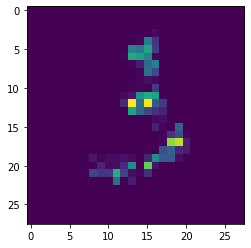

In [43]:
import matplotlib.pyplot as plt
pn = np.zeros(shape=result.x.shape)
pn[:]=result.x
print(cem.label)
print(cem.predict(pn))
pn=np.squeeze(pn)
plt.imshow(pn)
print(pn.shape)